In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt


In [8]:
# Load the dataset
df = pd.read_csv("23-24Season.csv")

# Only keep relevant columns and drop rows with missing values
df = df[['HomeTeam', 'AwayTeam', 'FTR']].dropna()

# Create a binary target: 1 = Home win (H), 0 = Not home win (D or A)
df['Target'] = df['FTR'].apply(lambda x: 1 if x == 'H' else 0)

# Drop the original FTR column
df = df.drop(columns=['FTR'])


In [9]:
# One-hot encode teams (drop_first=True to avoid multicollinearity)
df = pd.get_dummies(df, columns=['HomeTeam', 'AwayTeam'], drop_first=True)

In [10]:
# Define features and target
X = df.drop(columns=['Target'])
y = df['Target']

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [16]:
# Predict on test set
y_pred = model.predict(X_test)

# Report and Confusion Matrix
print("🔍 Classification Report:\n", classification_report(y_test, y_pred))
print("🧮 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

🔍 Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.76      0.69        45
           1       0.52      0.39      0.44        31

    accuracy                           0.61        76
   macro avg       0.58      0.57      0.57        76
weighted avg       0.59      0.61      0.59        76

🧮 Confusion Matrix:
 [[34 11]
 [19 12]]


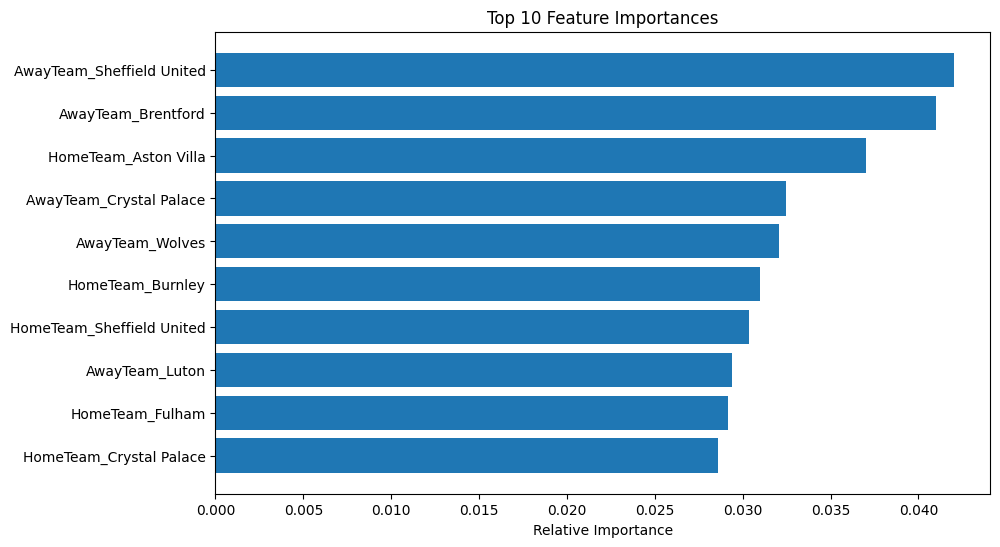

In [17]:
# Get feature importances
importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)[-10:]  # Top 10

# Plot
plt.figure(figsize=(10, 6))
plt.title("Top 10 Feature Importances")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()


In [19]:
print(y.value_counts())

Target
0    205
1    175
Name: count, dtype: int64


In [22]:
# Convert boolean features to integers to avoid SMOTE error
X_train = X_train.astype(int)
X_test = X_test.astype(int)
y_train = y_train.astype(int)

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

print("Original training set shape:", X_train.shape, y_train.shape)
print("Resampled training set shape:", X_train_sm.shape, y_train_sm.shape)
print("Resampled target distribution:")
print(pd.Series(y_train_sm).value_counts())

Original training set shape: (304, 38) (304,)
Resampled training set shape: (320, 38) (320,)
Resampled target distribution:
Target
0    160
1    160
Name: count, dtype: int64
